In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Load the dataset into python environment

In [2]:
df=pd.read_excel('D:\ICTAK\dataset\iris2.xls')
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Checking for missing values

In [3]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

## Filling the missing values

In [4]:
df['SL'].fillna(round(df['SL'].median(),1),inplace=True)
df['SW'].fillna(round(df['SW'].median(),1),inplace=True)
df['PL'].fillna(round(df['PL'].median(),1),inplace=True)

df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,4.3,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Checking for outliers

<AxesSubplot:>

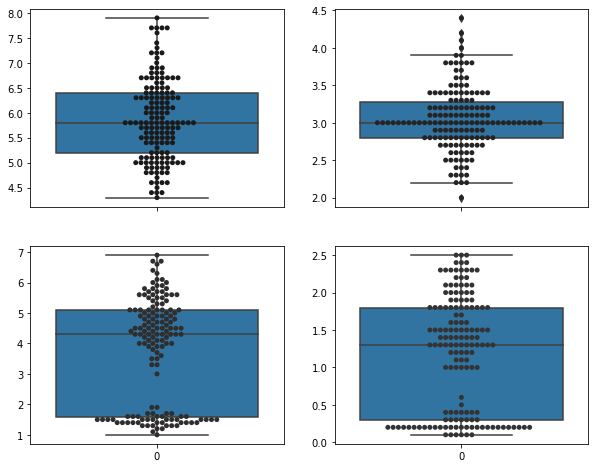

In [5]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,8))
sns.boxplot(ax=axes[0, 0], data=df['SL'])
sns.swarmplot(ax=axes[0, 0], data=df['SL'],color='.10')
sns.boxplot(ax=axes[0, 1], data=df['SW'])
sns.swarmplot(ax=axes[0, 1], data=df['SW'],color='.14')
sns.boxplot(ax=axes[1, 0], data=df['PL'])
sns.swarmplot(ax=axes[1, 0], data=df['PL'],color='.18')
sns.boxplot(ax=axes[1, 1], data=df['PW'])
sns.swarmplot(ax=axes[1, 1], data=df['PW'],color='.20')

###### From figure we can observe that the Featue 'SW' has some outliers

## Removing Outliers

In [6]:
Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')
Q3=np.percentile(df['SW'],75,interpolation='midpoint')

IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR

df['SW']=np.where(df['SW']>upp_lim,upp_lim,np.where(df['SW']<low_lim,low_lim,df['SW']))

<AxesSubplot:>

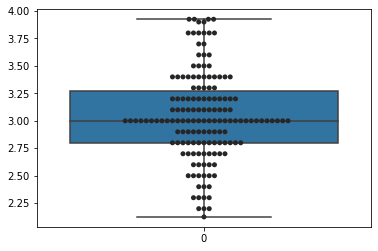

In [7]:
sns.boxplot( data=df['SW'])
sns.swarmplot(data=df['SW'],color='.15')

## Encoding the data



In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Classification']= le.fit_transform(df['Classification'])
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,4.3,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
X = df.drop('Classification',axis=1)
y = df['Classification']

from sklearn.model_selection import train_test_split
from sklearn import linear_model

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pred=model.predict(x_test)
print('MSE is ', mean_squared_error(y_test, pred))
print('R squared value is ', r2_score(y_test, pred))

MSE is  0.0375108754030201
R squared value is  0.9463278412357423


## Scaling using MinMax Scaler

In [10]:
X = df.drop('Classification',axis=1)

min_max = preprocessing.MinMaxScaler(feature_range=(0,2))
X = min_max.fit_transform(X)

pd.DataFrame(X).describe()


,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.862963,1.018333,0.941695,0.915556
std,0.449204,0.447693,0.586030,0.635967
min,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.750000,0.203390,0.166667
50%,0.833333,0.972222,1.118644,1.000000
75%,1.166667,1.277778,1.389831,1.416667
max,2.000000,2.000000,2.000000,2.000000


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pred=model.predict(x_test)
print('MSE is ', mean_squared_error(y_test, pred))
print('R squared value is ', r2_score(y_test, pred))

MSE is  0.037510875403020165
R squared value is  0.9463278412357422


##### Insight : R-squared vlaue and Mean Square error remains same after MinMax scaling.

## Logistic Regression Model

In [12]:
log_reg = linear_model.LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

model = log_reg.fit(x_train, y_train)
pred  = model.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

print('accuracy is: ',round(accuracy_score(y_test,pred),4))
print('Precision is: ',round(precision_score(y_test,pred,average='micro'),4))
print('recall score is: ',round(recall_score(y_test,pred,average='micro'),4))
print('f1 score is: ',round(f1_score(y_test,pred,average='micro'),4))

accuracy is:  1.0
Precision is:  1.0
recall score is:  1.0
f1 score is:  1.0


## KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

X = df.drop('Classification',axis=1)
y = df['Classification']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

k_val = np.arange(3,15)
acc_val = []
for k in k_val:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski')
    classifier.fit(x_train, y_train)
    pred  = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred)
    acc_val.append(acc)

Text(0, 0.5, 'Accuracy')

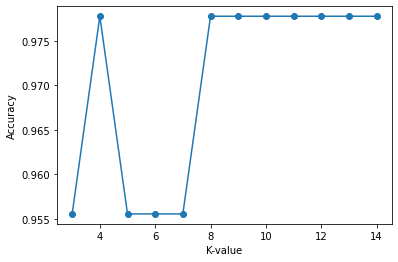

In [15]:
plt.plot(k_val,acc_val,'o-')
plt.xlabel('K-value')
plt.ylabel('Accuracy')

##### Insight: from k = 5 and upwards we have accuracy = 1 so we take k value as 5

In [16]:
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski')
classifier.fit(x_train, y_train)
pred  = classifier.predict(x_test)
   

print('accuracy is: ',accuracy_score(y_test,pred))
print('Precision is: ',precision_score(y_test,pred,average='micro'))
print('recall score is: ',recall_score(y_test,pred,average='micro'))
print('f1 score is: ',f1_score(y_test,pred,average='micro'))

accuracy is:  0.9777777777777777
Precision is:  0.9777777777777777
recall score is:  0.9777777777777777
f1 score is:  0.9777777777777777


## Decision Tree Classifier model

In [17]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop('Classification',axis=1)
y = df['Classification']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
pred  = dt_model.predict(x_test)

print('accuracy is: ',accuracy_score(y_test,pred))
print('Precision is: ',precision_score(y_test,pred,average='micro'))
print('recall score is: ',recall_score(y_test,pred,average='micro'))
print('f1 score is: ',f1_score(y_test,pred,average='micro'))

accuracy is:  1.0
Precision is:  1.0
recall score is:  1.0
f1 score is:  1.0


## SVM model

In [18]:
from sklearn.svm import SVC

X = df.drop('Classification',axis=1)
y = df['Classification']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

svm_linear = SVC(kernel="linear")
svm_linear.fit(x_train, y_train)
pred  = dt_model.predict(x_test)

print('accuracy is: ',accuracy_score(y_test,pred))
print('Precision is: ',precision_score(y_test,pred,average='micro'))
print('recall score is: ',recall_score(y_test,pred,average='micro'))
print('f1 score is: ',f1_score(y_test,pred,average='micro'))

accuracy is:  1.0
Precision is:  1.0
recall score is:  1.0
f1 score is:  1.0


## Random Forest Algorithm

In [19]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Classification',axis=1)
y = df['Classification']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

print('accuracy is: ',accuracy_score(y_test,pred))
print('Precision is: ',precision_score(y_test,pred,average='micro'))
print('recall score is: ',recall_score(y_test,pred,average='micro'))
print('f1 score is: ',f1_score(y_test,pred,average='micro'))

accuracy is:  1.0
Precision is:  1.0
recall score is:  1.0
f1 score is:  1.0


### Taking accuracy values of all the models Decision tree And Random Forest models have the best accuracy